In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-4-127c678508f7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-127c678508f7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# start of visualization
import seaborn as sns
import matplotlib.pyplot as plt

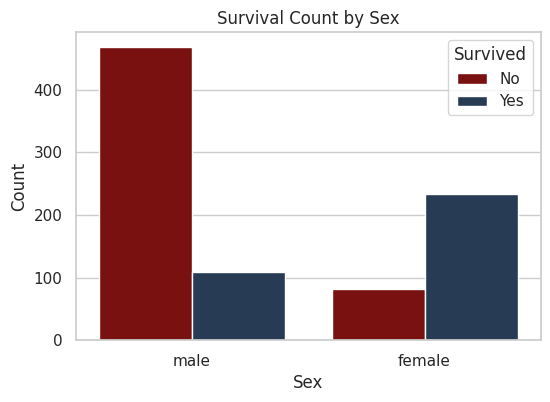

In [ ]:
# firstly, check the amount of survived people by gender
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

custom_palette = {0: '#8b0000', 1: '#1f3b5c'}
sns.countplot(x='Sex', hue='Survived', data=df, palette=custom_palette)

plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

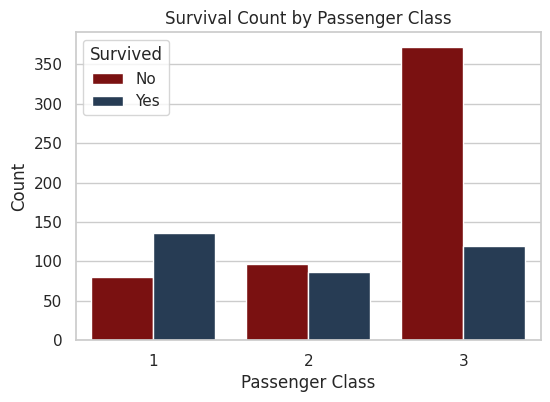

In [ ]:
# check the number of survival by cabins
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

custom_palette = {0: '#8b0000', 1: '#1f3b5c'}
sns.countplot(x='Pclass', hue='Survived', data=df, palette=custom_palette)

plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The amount of people survived from the first class accounts the highest among the three, and that of the third class ranks two with a substantial casualty.

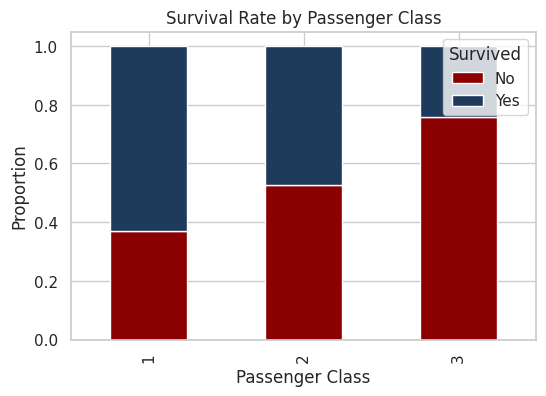

In [ ]:
pclass_survival_rate = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
pclass_survival_rate.plot(kind='bar', stacked=True, figsize=(6,4), color=['#8b0000', '#1f3b5c'])

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Proportion')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

We can obviously see that there were higher survival rate in higher classes.

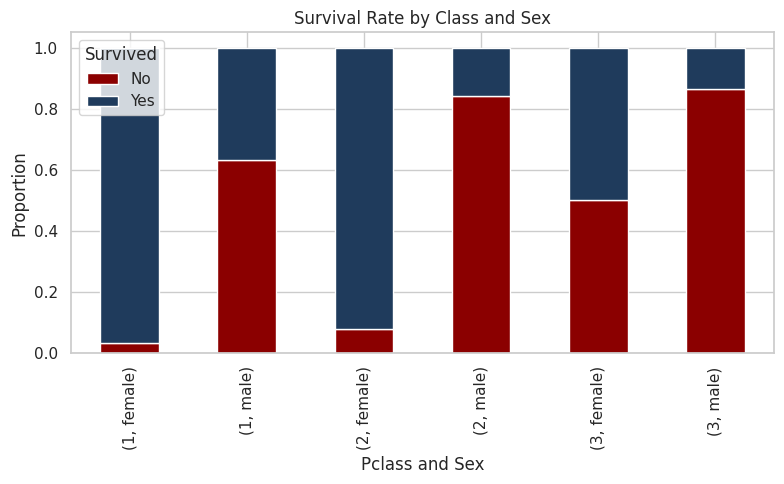

In [ ]:
grouped = df.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True).unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(8,5), color=['#8b0000', '#1f3b5c'])

plt.title('Survival Rate by Class and Sex')
plt.xlabel('Pclass and Sex')
plt.ylabel('Proportion')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

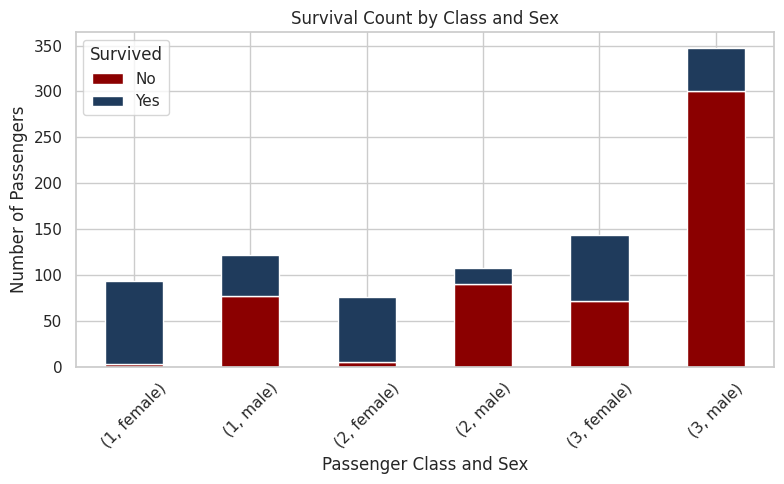

In [ ]:
group_counts = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)
group_counts = group_counts.reindex([
    (1, 'female'), (1, 'male'),
    (2, 'female'), (2, 'male'),
    (3, 'female'), (3, 'male')
])
group_counts.plot(kind='bar', stacked=True, figsize=(8,5), color=['#8b0000', '#1f3b5c'])

plt.title('Survival Count by Class and Sex')
plt.xlabel('Passenger Class and Sex')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

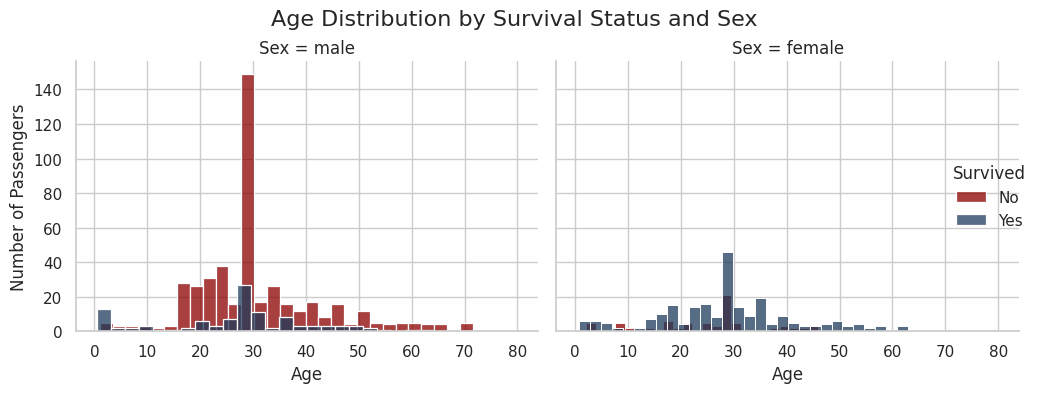

In [ ]:
# add the relationship with age into the survival analysis
custom_palette = {0: '#8b0000', 1: '#1f3b5c'}

g = sns.FacetGrid(df, col="Sex", hue="Survived", height=4, aspect=1.2, palette=custom_palette)
g.map(sns.histplot, "Age", bins=30, multiple="stack")

g.add_legend(title="Survived", labels=['No', 'Yes'])
g.set_axis_labels("Age", "Number of Passengers")
g.fig.suptitle("Age Distribution by Survival Status and Sex", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.85)
plt.show()

Now we can easily know which group of people with different age and gender sacrifice the most.
Most famales survived, with a partial of males between 20s to 40s and infants getting saved.

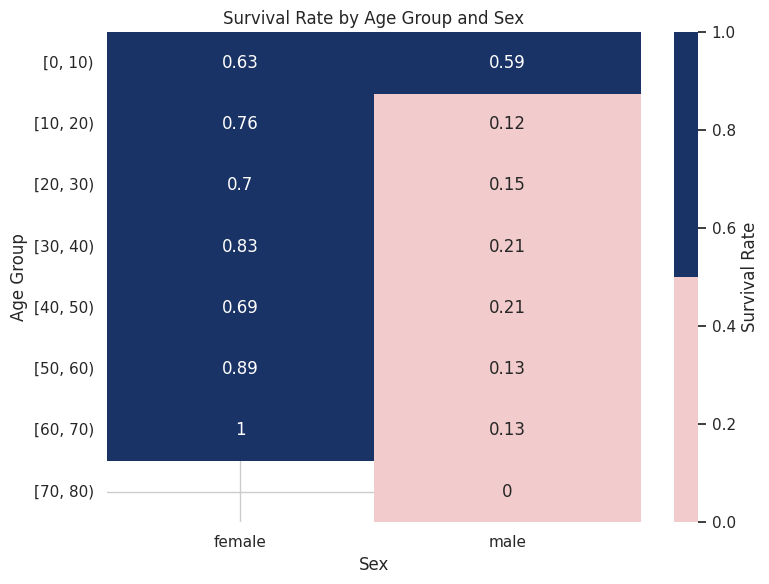

In [ ]:
# present the survival rate in different age group in a obvious way

df['AgeGroup'] = pd.cut(df['Age'], bins=range(0, 81, 10), right=False)

age_sex_survival = df.groupby(['AgeGroup', 'Sex'], observed=True)['Survived'].mean().unstack()

custom_colors = {
    0: '#8b0000',
    1: '#1f3b5c'
}

cmap = [[0.95, 0.8, 0.8], [0.1, 0.2, 0.4]]

plt.figure(figsize=(8, 6))
sns.heatmap(age_sex_survival, annot=True, cmap=cmap, cbar_kws={'label': 'Survival Rate'})

plt.title('Survival Rate by Age Group and Sex')
plt.xlabel('Sex')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

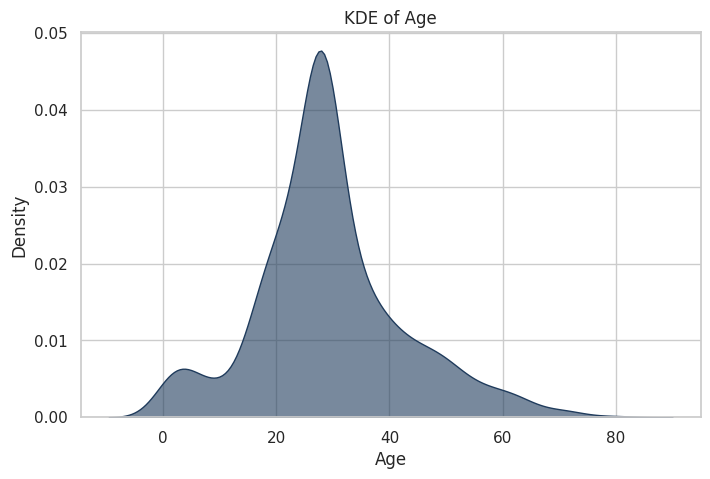

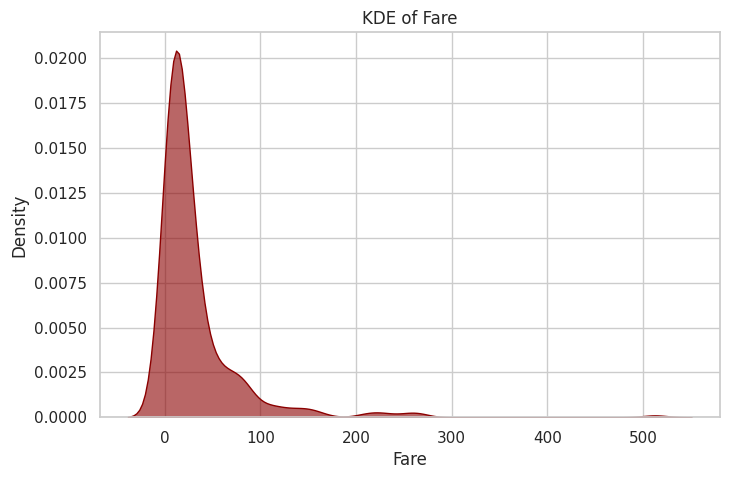

In [ ]:
# try to build the KDE of age and ticket fare
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Age', fill=True, color='#1f3b5c', alpha=0.6)
plt.title('KDE of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Fare', fill=True, color='#8b0000', alpha=0.6)
plt.title('KDE of Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

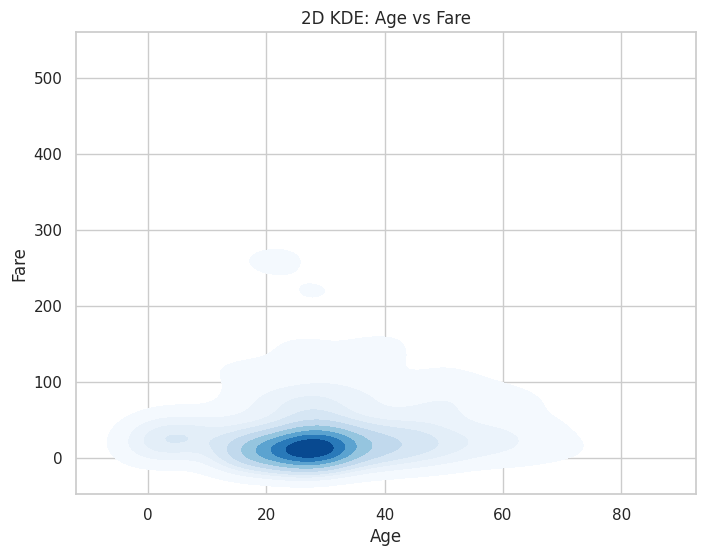

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', y='Fare', fill=True, cmap='Blues')
plt.title('2D KDE: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

Most passengers aged between 20s to 40s, with tickets charging 0 to 50 dollors.
There was a scarce group of young adults having highly-charged tickets above 200 dollars.

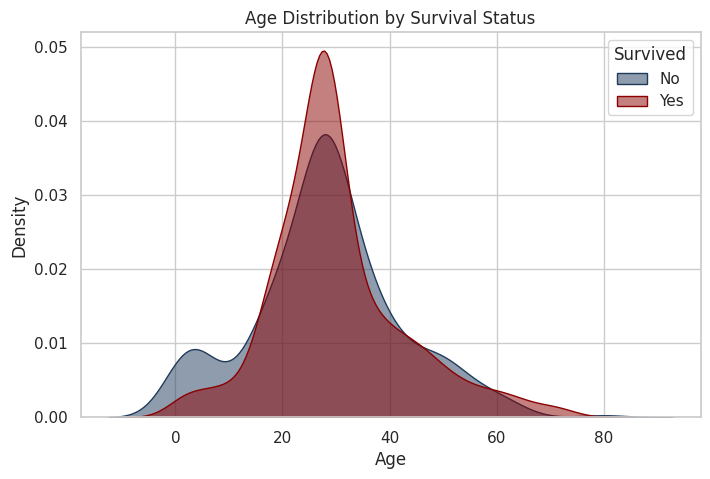

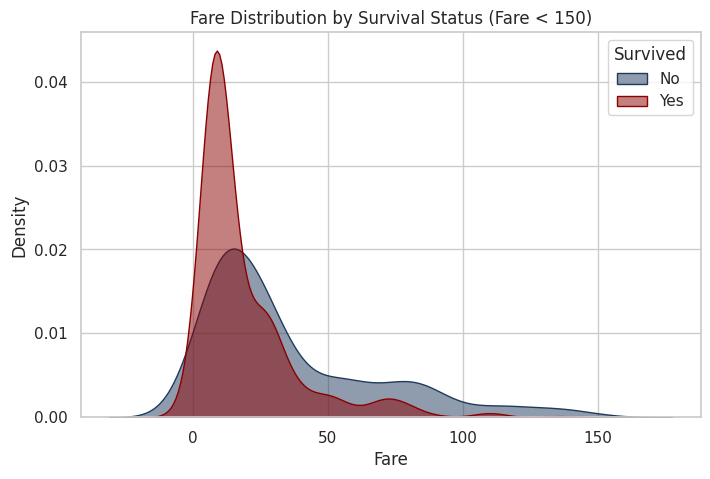

In [ ]:
custom_palette = {0: '#8b0000', 1: '#1f3b5c'}

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, common_norm=False, palette=custom_palette, alpha=0.5)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

filtered_df = df[df['Fare'] < 150]

plt.figure(figsize=(8, 5))
sns.kdeplot(data=filtered_df, x='Fare', hue='Survived', fill=True, common_norm=False, palette=custom_palette, alpha=0.5)
plt.title('Fare Distribution by Survival Status (Fare < 150)')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In the first graph of grouped KED, people survived have more condensed distribution.
In the second that displayed the fare distribution, it was obviously that those survived were people buying tickets below 50 dollars.